# Sequence Space Jacobian method to Solve HANK models

- The sequence space jacobian method is a computational method to solve general equilibrium models (with both rich micro heterogeneity and without)



- Method linearizes the model to first order to solve for solutions to small MIT shocks.


- The algorithm assumes that agents have perfect foresight on macro aggregates (i.e. Model is deterministic with respect to aggregate states).


- Method allows for the fast computation of jacobian matrices that summarize the aggregate behavior of agents with rich micro heterogeneity (Heterogenous households, firms, etc.)




# Advantages of SSJ

Can solve general equilibrium models with rich microeconomic heterogeneity quickly. (Basic HANK models can take 3 seconds, previous methods take at least 15 minutes)

Can add additional exogenous shocks at virtually no cost.



## Krusell Smith Model in Sequence Space

 ### Households

Assume a continuum of atomistic households on the unit interval $[0,1]$ indexed by i. 

Assume households have perfect foresight over the real interest rate $r_{t}$ and the real wage $w_{t}$.





$$
V_{t}(m_{t}) = \max_{c_{t}} u(c_{t}) + E_{t}\left[ V_{t+1}(m_{t+1}) \right]
$$

#### Budget Constraint

$$ m_{ t} = z_{t}  + (1+\mathit{r}_{t})k_{ t-1}$$

$$ c_{ t}  + k_{t}= z_{ t}  + (1+\mathit{r}_{t}) k_{ t-1}  $$ 

$$k_{t} \geq 0$$

where 

$m_{t}$ is cash on hand.

$k_{t}$ value capital holdings.

$z_{t}$ is labor income.


#### Labor Income

Labor income is composed of permanent component $\mathit{p}$ and transitory component $\theta$. 


$$z_{t} =  \theta_{it} w_{t} \bar{L}$$






$ log(\theta_{it}) \sim N\left(-\frac{\sigma_{\theta}^2}{2}, \sigma_{\theta}^2 \right)$ 





## Firms

$$Y_{t} = Z_{t}K_{t}^{\alpha}L_{t}^{1-\alpha}$$

### F.O.C.

$$
w_{t} = (1-\alpha) Z_{t} K_{t}^{\alpha}L_{t}^{-\alpha}
$$

$$
r_{t} = \alpha  Z_{t} K_{t}^{\alpha - 1} L_{t}^{1-\alpha}
$$

where $log(Z_{t}) = \rho_{Z} log( Z_{t-1}) + \epsilon_{Z}$



## Market Clearing 


$$ K_{t} = \mathcal{K}_{t}\left(\left\{r_{s},w_{s}\right\}_{s=0}^{T} \right)$$



$$L_{t} = \bar{L}$$




where $$\mathcal{K}_{t}\left(\left\{r_{s},w_{s}\right\}_{s=0}^{T} \right) = \int_{0}^{1} k_{it}(\left\{r_{s},w_{s}\right\}_{s=0}^{T}) di = \int k_{t}(m, \left\{r_{s},w_{s}\right\}_{s=0}^{T}) d\Phi(m)$$

# Define model as a system of difference equations in sequence space

$$ H_{t}(\mathbf{U},\mathbf{Z}) = \begin{pmatrix} 
 \mathcal{K}_{t}(\{r_{s} ,w_{s} \}_{s=0}^{s=T}) - K_{t}  \\ \\
  w_{t} - (1-\alpha) Z_{t} K_{t}^{\alpha} \bar{L}^{-\alpha} \\ \\
r_{t} - \alpha  Z_{t} K_{t}^{\alpha - 1} \bar{L}^{1-\alpha} \\ \\
 \end{pmatrix} = \begin{pmatrix} 0 \\ 0  \\ 0\\ \end{pmatrix} , \quad t=0,1 ,2,3,....$$
 
 where 
 

 
 $\mathbf{U} = \left(K_{t} , r_{t} , w_{t} \right)_{t=0}^{t=T}$ 
 
 $\mathbf{Z} = \left(Z_{t}\right)_{t=0}^{t=T}$
 
Now define $$\mathbf{H}(\mathbf{U},\mathbf{Z})= \begin{pmatrix} 
H_{0}(\mathbf{U},\mathbf{Z}) \\ \\
. \\ \\
. \\ \\
 H_{t}(\mathbf{U},\mathbf{Z}) \\ \\
 . \\ \\
 . \\ \\
H_{T}(\mathbf{U},\mathbf{Z}) \\ \\
 \end{pmatrix} = \begin{pmatrix} 0 \\ .\\ 0 \\ . \\ 0\\ \end{pmatrix}$$
 
 

# How to solve this model?

- Linearize around steady state.

By implicit function theorem


$$ d\mathbf{U} = -\mathbf{H}_{\mathbf{U}}^{-1}(\mathbf{U}_{ss},\mathbf{Z}_{ss}) \mathbf{H}_{\mathbf{Z}}(\mathbf{U}_{ss},\mathbf{Z}_{ss}) d\mathbf{Z}$$

or to be trite

$$ d\mathbf{U} = -\mathbf{H}_{\mathbf{U}}^{-1} \mathbf{H}_{\mathbf{Z}} d\mathbf{Z}$$


where $d\mathbf{U} = \left(dK_{t} , dr_{t} , dw_{t} \right)_{t=0}^{t=T}$ is the endogenous impulse response to some exogenous shock $d\mathbf{Z} = \left(dZ_{t}\right)_{t=0}^{t=T}$

## Heterogenous Agent Jacobian 

When computing $-\mathbf{H}_{\mathbf{U}}^{-1}(\mathbf{U}_{ss},\mathbf{Z}_{ss})$ we will need to compute the jacobian of  $$\mathbf{F}(\mathbf{r},\mathbf{w}) =  \begin{pmatrix} \mathcal{K}_{0}(\{r_{s} ,w_{s} \}_{s=0}^{s=T})\\ \\
.\\ \\
. \\ \\
\mathcal{K}_{t}(\{r_{s} ,w_{s} \}_{s=0}^{s=T})\\ \\
.\\ \\
.\\ \\
\mathcal{K}_{T}(\{r_{s} ,w_{s} \}_{s=0}^{s=T})\\ \\
\end{pmatrix} $$ 


More specifically we will need the Jacobian Matrix $\mathbf{F}_{\mathbf{r}}(\mathbf{r},\mathbf{w})$ and $\mathbf{F}_{\mathbf{r}}(\mathbf{r},\mathbf{w})$

where
  
  $$ \mathbf{F}_{\mathbf{r}}(\mathbf{r},\mathbf{w}) = \begin{pmatrix} 
\frac{ \partial \mathcal{K}_{0}}{\partial r_{0}}  & ... & \frac{ \partial \mathcal{K}_{0}}{ \partial r_{t}} & ... & \frac{ \partial  \mathcal{K}_{0}}{\partial r_{T}} \\ . \\ .
\\ 
.
\\
\frac{ \partial \mathcal{K}_{t}}{\partial r_{0}}  & ... & \frac{ \partial \mathcal{K}_{t}}{ \partial r_{t}} & ... & \frac{ \partial \mathcal{K}_{t}}{\partial r_{T}} \\ . \\ .
\\ . \\
\frac{ \partial \mathcal{K}_{T}}{\partial r_{0}}  & ...  & \frac{ \partial \mathcal{K}_{T}}{ \partial r_{t}} & ... & \frac{ \partial  \mathcal{K}_{T}}{\partial r_{T}}  \\ \\
 \end{pmatrix} $$
 



- These Jacobian matrices are the most computationally complex object to compute in the model. Direct methods can take up to 20 minutes for each matrix.

- The sequence space jacobian methodology proposes a 'fake news' algorithm to solve these matrices in under 3 seconds!



## Overall algorithm


1. Define model in sequence space

$$\mathbf{H}(\mathbf{U},\mathbf{Z}) = \mathbf{0}$$

2. Solve for steady state

$$\mathbf{H}(\mathbf{U}_{ss},\mathbf{Z}_{ss}) = \mathbf{0}$$

where $\mathbf{U}_{ss} = \left(U_{ss}, .. U_{ss}, .., U_{ss} \right)$ 

3. Linearize around steady state and solve for impulse responses $d\mathbf{U}$ given exogenous shock $d\mathbf{Z}$

$$ d\mathbf{U} = -\mathbf{H}_{\mathbf{U}}^{-1} \mathbf{H}_{\mathbf{Z}} d\mathbf{Z}$$

- When linearizing , solve heterogenous agent jacobians with fake news algorithm


## What if model contains many equations?

The system above can be reduced to 

$$ H_{t}(\mathbf{U},\mathbf{Z}) = \begin{pmatrix} 
 \mathcal{K}_{t}(\{\alpha  Z_{t} K_{t}^{\alpha - 1} \bar{L}^{1-\alpha} ,(1-\alpha) Z_{s} K_{s}^{\alpha} \bar{L}^{-\alpha} \}_{s=0}^{s=T}) - K_{t}  \\ \\
 \end{pmatrix} = 0, \quad t=0,1 ,2,3,....$$
 
 where  $\mathbf{U} = \left(K_{0},K_{1}.K_{2}....,K_{T}  \right)$ 



When the model contains many equations, we can represent the model as a directed acyclic graph to determine how the model should be reduced. 

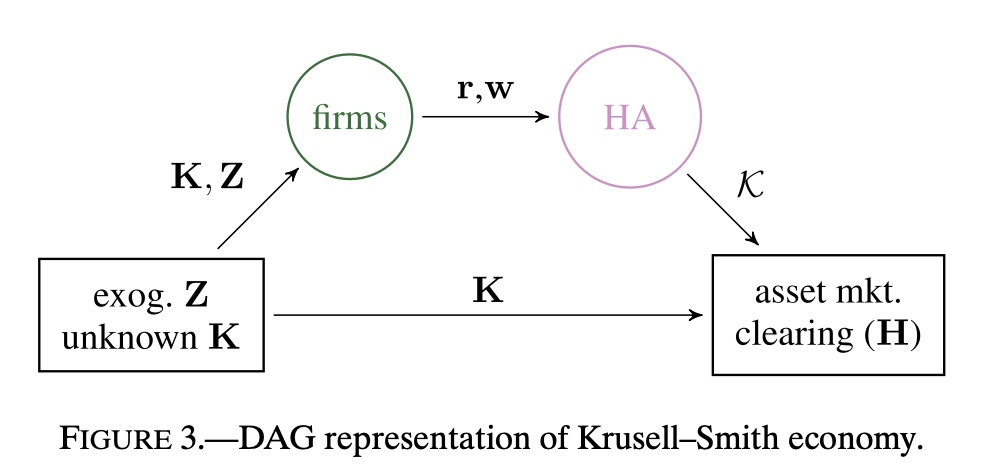

In [6]:
from IPython import display
display.Image("KS_DAG.jpeg")